<a href="https://colab.research.google.com/github/mehakh/mehakh/blob/main/Copy_of_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

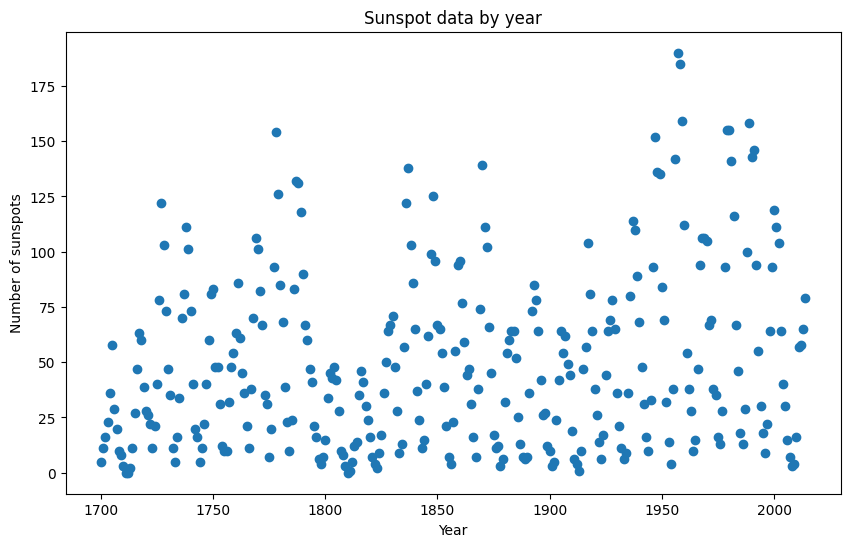

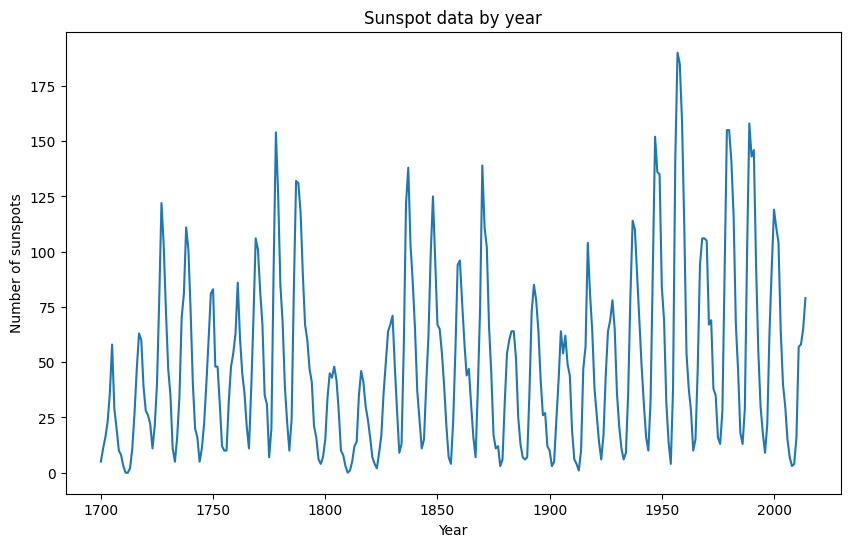

Pu: (200, 2)
Tu: (200, 1)
Weights:  [[-0.67608198  1.37150939]]
Bias:  [13.40368324]


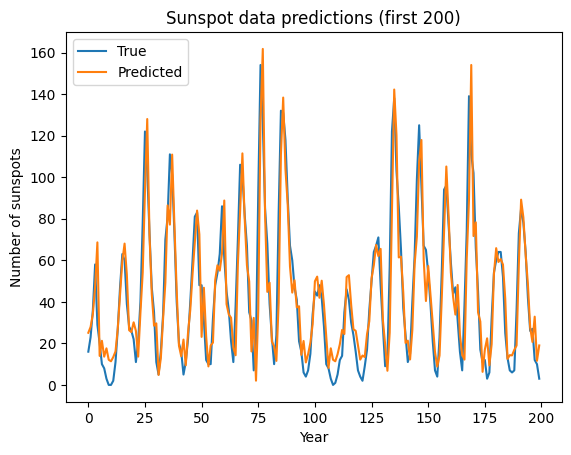

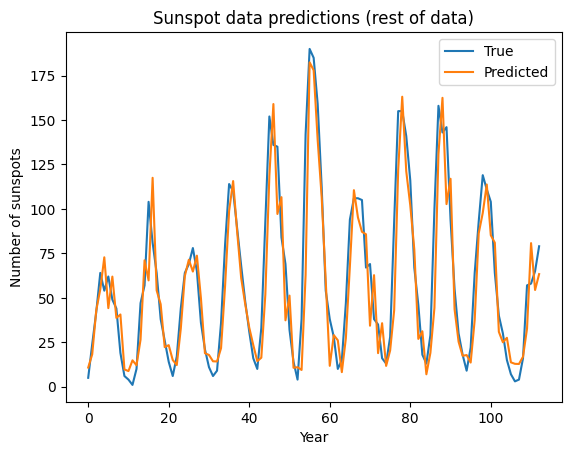

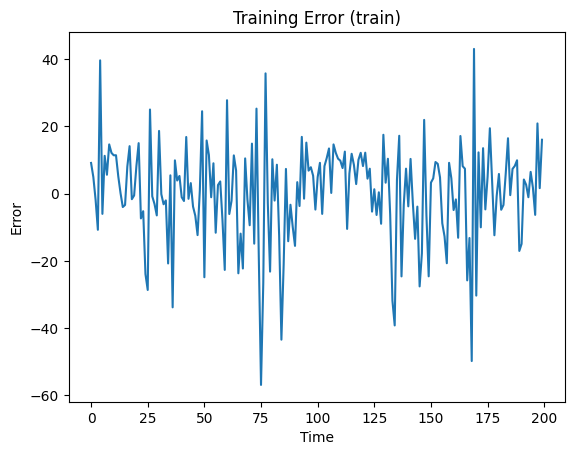

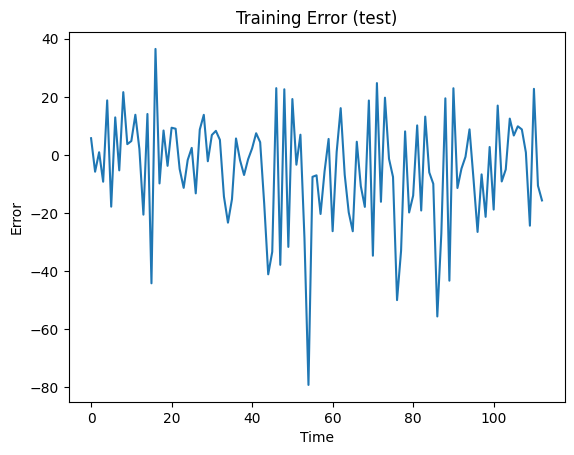

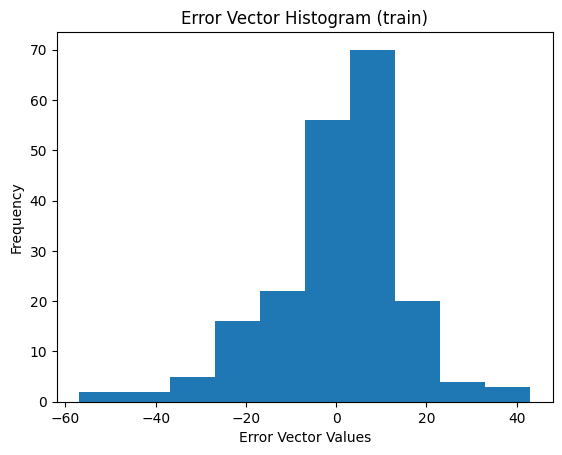

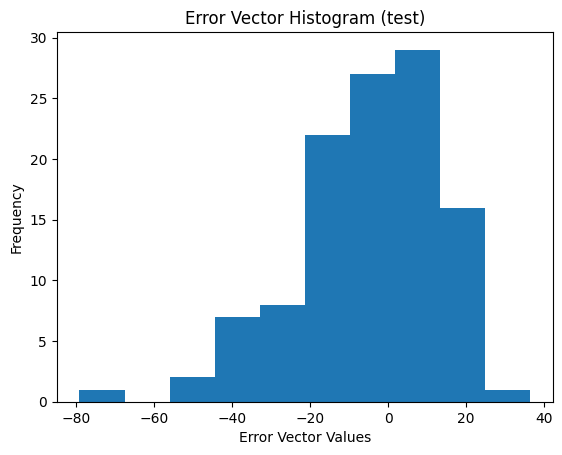

Training MSE: 217.1720799837935
Testing MSE: 386.40419314929693
Training MAD: 8.117326498511467
Testing MAD: 12.165850641079025
Weights (Polynomial Regression):  [[ 0.00000000e+00 -1.26598580e+00  1.97716882e+00  1.17384734e-02
  -1.34627937e-02  1.01911801e-03]]
Bias (Polynomial Regression):  [11.9621822]


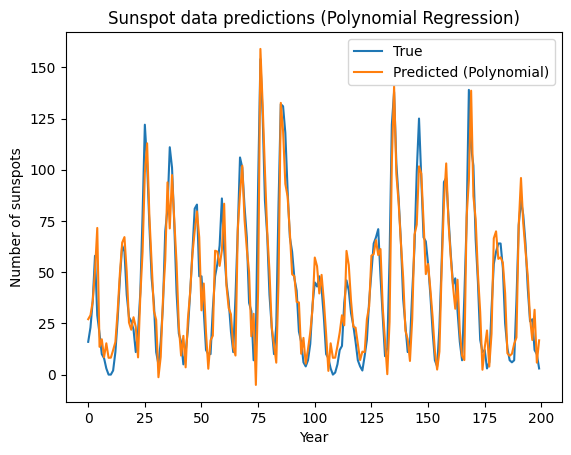

Training MSE (Polynomial Regression): 161.47444621815765


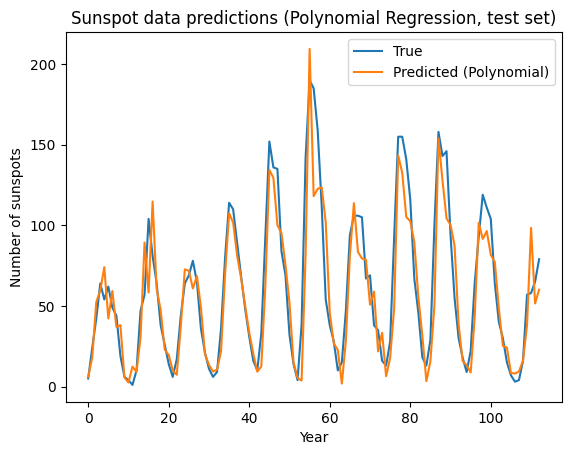

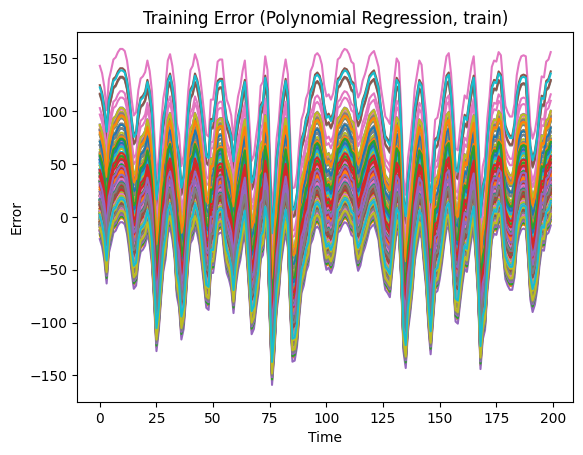

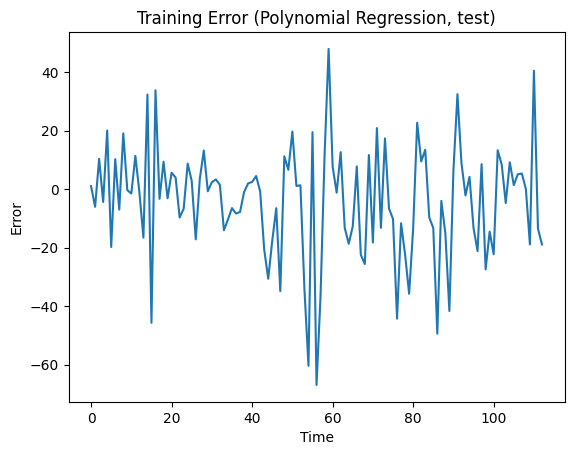

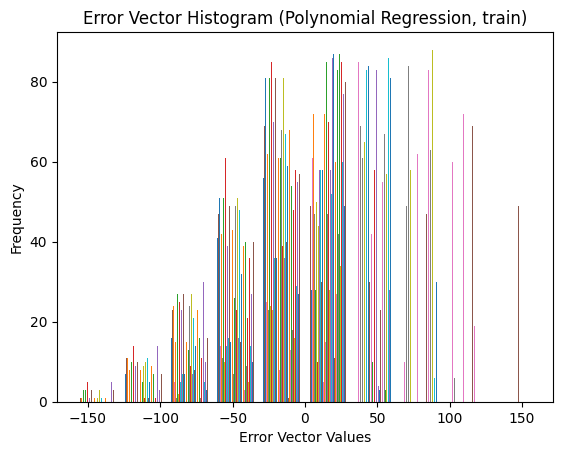

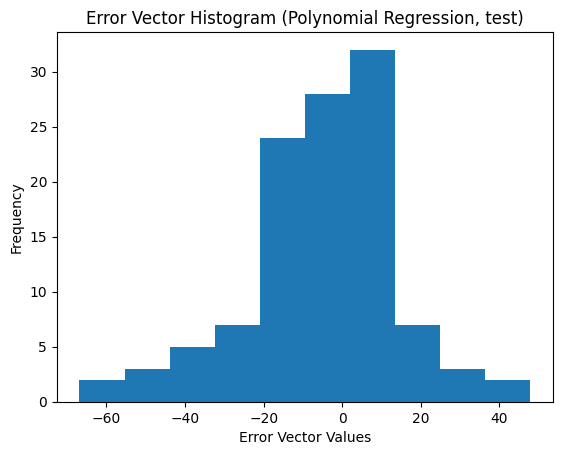

Testing MSE (Polynomial Regression): 3923.8539179107875
Training MAD (Polynomial Regression): 30.431640640655605
Testing MAD (Polynomial Regression): 11.506257839386642


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Task 4: Load and visualize sunspot data
sunspot = np.loadtxt('/sunspot.txt', delimiter='\t', dtype=int)
x = sunspot[:, 1].reshape((-1, 1))
y = sunspot[:, 0]

plt.figure(figsize=(10, 6))
plt.scatter(y, x)
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.title('Sunspot data by year')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y, x)
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.title('Sunspot data by year')
plt.show()

# Task 5: Prepare input (P) and target (T) data
L = sunspot.shape[0]
P = np.concatenate((sunspot[:L - 2, 1].reshape(-1, 1), sunspot[1:L - 1, 1].reshape(-1, 1)), axis=1)
T = sunspot[2:L, 1].reshape(1, -1)

# Task 7: Split data into training and test sets
train_size = 200
train_P = P[:train_size]
train_T = T[0][:train_size]
test_P = P[train_size:]
test_T = T[0][train_size:]

Pu = train_P[:train_size]
Tu = train_T[:train_size].reshape(-1, 1)

print("Pu:", Pu.shape)
print("Tu:", Tu.shape)

# Task 8: Create and fit a linear regression model
net = LinearRegression().fit(Pu, Tu)

# Task 9: Print weights and bias of the linear regression model
print("Weights: ", net.coef_)
print("Bias: ", net.intercept_)

weight = net.coef_
w1 = weight[0][0]
w2 = weight[0][1]
b = net.intercept_[0]

# Task 10: Predict and plot the results for the training set
Tsu = net.predict(Pu)

plt.plot(Tu, label='True')
plt.plot(Tsu, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.title('Sunspot data predictions (first 200)')
plt.legend()
plt.show()

# Task 11: Predict and plot the results for the test set
Ts = net.predict(test_P)

plt.plot(test_T, label='True')
plt.plot(Ts, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.title('Sunspot data predictions (rest of data)')
plt.legend()
plt.show()

# Task 12: Calculate and plot the training and test errors
error_train = Tsu.reshape(-1) - train_T
error_test = Ts.reshape(-1) - test_T

plt.plot(error_train)
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Training Error (train)')
plt.show()

plt.plot(error_test)
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Training Error (test)')
plt.show()

# Task 13: Plot the histograms of training and test errors
plt.hist(error_train, bins=10)
plt.xlabel('Error Vector Values')
plt.ylabel('Frequency')
plt.title('Error Vector Histogram (train)')
plt.show()

plt.hist(error_test, bins=10)
plt.xlabel('Error Vector Values')
plt.ylabel('Frequency')
plt.title('Error Vector Histogram (test)')
plt.show()

# Task 14: Calculate and print training and testing Mean Squared Error (MSE)
mse_train = np.mean(error_train ** 2)
print("Training MSE:", mse_train)

mse_test = np.mean(error_test ** 2)
print("Testing MSE:", mse_test)

mad_train = np.median(np.abs(error_train - np.median(error_train)))
print("Training MAD:", mad_train)

mad_test = np.median(np.abs(error_test - np.median(error_test)))
print("Testing MAD:", mad_test)

# Task 15: Perform polynomial regression
poly_features = PolynomialFeatures(degree=2)
Pu_poly = poly_features.fit_transform(Pu)

net_poly = LinearRegression().fit(Pu_poly, Tu)

# Task 16: Print weights and bias of the polynomial regression model
print("Weights (Polynomial Regression): ", net_poly.coef_)
print("Bias (Polynomial Regression): ", net_poly.intercept_)

# Task 17: Predict and plot the results for the training set using polynomial regression
Tsu_poly = net_poly.predict(Pu_poly)

plt.plot(Tu, label='True')
plt.plot(Tsu_poly, label='Predicted (Polynomial)')
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.title('Sunspot data predictions (Polynomial Regression)')
plt.legend()
plt.show()

# Task 18: Calculate training Mean Squared Error (MSE) for polynomial regression
mse_train_poly = np.mean((Tsu_poly - Tu) ** 2)
print("Training MSE (Polynomial Regression):", mse_train_poly)

# Task 19: Predict and plot the results for the test set using polynomial regression
Pu_test_poly = poly_features.transform(test_P)
Ts_poly = net_poly.predict(Pu_test_poly)

plt.plot(test_T, label='True')
plt.plot(Ts_poly, label='Predicted (Polynomial)')
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.title('Sunspot data predictions (Polynomial Regression, test set)')
plt.legend()
plt.show()

# Task 20: Calculate and plot the training and test errors for polynomial regression
error_train_poly = Tsu_poly.reshape(-1) - Tu
error_test_poly = Ts_poly.reshape(-1) - test_T

plt.plot(error_train_poly)
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Training Error (Polynomial Regression, train)')
plt.show()

plt.plot(error_test_poly)
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Training Error (Polynomial Regression, test)')
plt.show()

# Task 21: Plot the histograms of training and test errors for polynomial regression
plt.hist(error_train_poly, bins=10)
plt.xlabel('Error Vector Values')
plt.ylabel('Frequency')
plt.title('Error Vector Histogram (Polynomial Regression, train)')
plt.show()

plt.hist(error_test_poly, bins=10)
plt.xlabel('Error Vector Values')
plt.ylabel('Frequency')
plt.title('Error Vector Histogram (Polynomial Regression, test)')
plt.show()

# Task 22: Calculate and print testing Mean Squared Error (MSE) and Median Absolute Deviation (MAD) for polynomial regression
mse_test_poly = np.mean((Ts_poly - test_T) ** 2)
print("Testing MSE (Polynomial Regression):", mse_test_poly)

mad_train_poly = np.median(np.abs(error_train_poly - np.median(error_train_poly)))
print("Training MAD (Polynomial Regression):", mad_train_poly)

mad_test_poly = np.median(np.abs(error_test_poly - np.median(error_test_poly)))
print("Testing MAD (Polynomial Regression):", mad_test_poly)









